<a href="https://colab.research.google.com/github/PBHPBH/Machine_Learning/blob/NLP/8__%ED%85%8D%EC%8A%A4%ED%8A%B8_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive 
drive.mount('/content/gdrive/')
naver_dir = '/content/gdrive/MyDrive/pytest/네이버뉴스-생활문화_다중/'

Mounted at /content/gdrive/


In [ ]:
#Data Loading Preparation
# 경로를 설정하고, 분류할 종류를 리스트로 만든다
import os
train_dir = os.path.join(naver_dir, 'train')
test_dir = os.path.join(naver_dir, 'test')
label_types = ['건강정보', '공연전시', '도로교통', '여행레저', '음식맛집', '자동차시승기', '종교', '책', '패션뷰티']

In [ ]:
def make_texts_labels(dir, label_types, encode='utf8'): # texts와 labels 리스트를 만드는 함수
    texts = []
    labels = []
    
    for label_type in label_types:
        dir_name = os.path.join(dir, label_type) # 각각의 label 폴더에 접근한다
        for fname in os.listdir(dir_name):
            if fname[-4:] == '.txt': # 마지막 4 글자가 .txt 로 끝나는지를 확인한다
                f = open(os.path.join(dir_name, fname), encoding=encode)
                texts.append(f.read()) # 텍스트를 읽어서 texts 리스트에 연결한다
                f.close()
                if label_type == label_types[0]: # 만약 현재 폴더가 '건강정보' 폴더라면
                    labels.append(0) # texts와 같은 순서의 labels 리스트에는 0을 저장한다
                elif label_type == label_types[1]:
                    labels.append(1)
                elif label_type == label_types[2]:
                    labels.append(2)
                elif label_type == label_types[3]:
                    labels.append(3)
                elif label_type == label_types[4]:
                    labels.append(4)
                elif label_type == label_types[5]:
                    labels.append(5)
                elif label_type == label_types[6]:
                    labels.append(6)
                elif label_type == label_types[7]:
                    labels.append(7)
                elif label_type == label_types[8]:
                    labels.append(8)
        return texts, labels

In [ ]:
#Train Data Loading
# 훈련 데이터의 텍스트와 라벨을 받아온다
texts, labels = make_texts_labels(train_dir, label_types)

print('texts 0:', texts[0])
print('texts len:', len(texts))
print('labels 0:', labels[0])
print('labels len:', len(labels))

texts 0: 라즈베리 로즈 입은 LG `G6` : 네이버 뉴스







LG전자가 밸런타인데이 날인 14일 이동통신 3사를 통해 매혹적인 장밋빛으로 인기를 끌고 있는 '라즈베리 로즈' 색상을 입힌 LG G6를 출시한다. LG전자 모델이 'G6 라즈베리 로즈'를 소개하고 있다.  LG전자 제공                                                                             디지털타임스 홈페이지 바로가기 / SNS 바로가기디지털타임스 영문뉴스 바로가기 / 카드뉴스 바로가기


texts len: 10
labels 0: 0
labels len: 10


In [ ]:

#Analyzing Morphology
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip install JPype1
!pip install rhinoMorph
# 한글은 tokenizing을 위해서 먼저 형태소분석을 해야 한다
import rhinoMorph
rn = rhinoMorph.startRhino() 
# 리스트 컴프리헨션으로 실질형태소만을 리스트로 가져온다
texts = [rhinoMorph.onlyMorph_list(rn, sentence, pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=False) for sentence in texts]
print(texts[0])

In [ ]:
#Data Tokenizing
%tensorflow_version 2.x
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import math

validation_ratio = math.floor(len(texts) * 0.3) # 30%는 검증데이터로 사용한다. 나머지는 훈련데이터
max_words = 10000 # 데이터셋에서 가장 빈도 높은 10,000 개의 단어만 사용한다
maxlen = 200 # 200개 이후의 단어는 버린다
class_number = 9 # 분류할 클래스의 수

tokenizer = Tokenizer(num_words=max_words) # 상위빈도 10,000 개의 단어만을 추려내는 Tokenizer 객체 생성
tokenizer.fit_on_texts(texts) # 단어 인덱스를 구축한다
word_index = tokenizer.word_index # 단어 인덱스만 가져온다

In [ ]:
#Tokenizing 결과 확인
# 전체 데이터가 가지고 있는 토큰의 수를 보여준다. texts_to_sequences()를 거쳐야 10,000개만 남는다. 
print('전체에서 %s개의 고유한 토큰을 찾았습니다.' % len(word_index))
print('word_index type: ', type(word_index))
print('word_index: ', word_index)

전체에서 1300개의 고유한 토큰을 찾았습니다.
word_index type:  <class 'dict'>
word_index:  {'하': 1, '되': 2, '있': 3, '자궁': 4, '뉴스': 5, '가': 6, '바로': 7, '적출술': 8, '받': 9, '여성': 10, '연구': 11, '이': 12, '약': 13, '및': 14, '경우': 15, '질환': 16, '백신': 17, '치료': 18, '수술': 19, '귀화': 20, '대하': 21, '개발': 22, '로': 23, '높': 24, '헬스': 25, '한약사': 26, '티': 27, '네이버': 28, '위하': 29, '노': 30, '바이러스': 31, '후': 32, '없': 33, '케어': 34, '인수': 35, '정부': 36, '한약': 37, '시장': 38, '대웅제약': 39, '종근당': 40, '통하': 41, '디지털': 42, '타임스': 43, '등': 44, '군': 45, '대조': 46, '스포츠서울': 47, '가속기': 48, '보': 49, '작년': 50, '성장': 51, '따르': 52, '환자': 53, '난소': 54, '폐경': 55, '린': 56, '한국콜마': 57, '업계': 58, '정책': 59, '글': 60, '발생': 61, '사업': 62, '의약품': 63, '계획': 64, '결과': 65, '자궁근종': 66, '국적': 67, '외국인': 68, '리아': 69, 'sns': 70, '최근': 71, 'sk': 72, '케미칼': 73, '평창': 74, '올림픽': 75, '증상': 76, '문제': 77, '한국': 78, '제약': 79, '산업': 80, '제품': 81, '알': 82, '지진': 83, '연구소': 84, '그': 85, '국가': 86, '투자': 87, '위원회': 88, '기록': 89, '주': 90, '적출': 91, '심혈관': 92, '치료법': 93, 

In [ ]:
#Data Sequencing
# train 데이터를 Sequencing 한다
# 상위 빈도 10,000개의 단어를 word_index의 숫자 리스트로 변환
data = tokenizer.texts_to_sequences(texts) 
# maxlen의 수만큼으로 길이를 고정한다
data = pad_sequences(data, maxlen=maxlen)
print('data:', data)

data: [[   0    0    0 ...    5    7    6]
 [   0    0    0 ...    6  114  155]
 [   0    0    0 ...    6  114  155]
 ...
 [1121  137 1122 ...  170  528   47]
 [ 118 1206  201 ...    6  114  155]
 [ 208   27   11 ...  170  528   47]]


In [ ]:
#One-Hot Encoding
# 원-핫 인코딩 함수
def to_one_hot(labels, dimension):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 입력층에는 원-핫-인코딩을 수행하지 않는다
# data = to_one_hot(data, dimension=max_words)

# 출력층만 원-핫-인코딩을 수행한다
labels = to_one_hot(labels, dimension=class_number)

In [ ]:
#Train 데이터와 Validation 데이터 준비
print('데이터 텐서의 크기:', data.shape) # (90, 200)
print('레이블 텐서의 크기:', labels.shape) # (90, 9) data와 label이 모두 2D 텐서가 되었음

indices = np.arange(data.shape[0]) # 0 ~ 89 까지의 숫자를 생성
np.random.shuffle(indices) # 0 ~ 89 까지의 숫자를 랜덤하게 섞음
data = data[indices] # 이것을 인덱스로 하여 2D 텐서 데이터를 섞음
labels = labels[indices] # label도 같은 순서로 섞음

x_train = data[validation_ratio:] # 훈련데이터의 70%를 훈련데이터
y_train = labels[validation_ratio:] # 훈련데이터의 70%를 훈련데이터 Label
x_val = data[:validation_ratio] # 훈련데이터의 30%를 검증데이터
y_val = labels[:validation_ratio] # 훈련데이터의 30%를 검증데이터 Label

데이터 텐서의 크기: (10, 200)
레이블 텐서의 크기: (10, 9)


In [ ]:
#모델 정의하기 – Word2Vec Embedding (1), 임베딩 딕셔너리 로딩
# 단어와 임베딩 값의 딕셔너리 로딩
filepath = '/content/gdrive/My Drive/pytest/'

embeddings_index = {} 
f = open(os.path.join(filepath+'word2vec', 'embedding_window10_mincnt5_skipgram.txt'), encoding='utf-8') #_big은 CP949
for line in f:
    values = line.split() # 텍스트 파일의 각 행을 분리
    word = values[0] # 각 행의 단어
    coefs = np.asarray(values[1:], dtype='float32') # 각 단어의 임베딩값
    embeddings_index[word] = coefs
f.close()
print('%s개의 단어 벡터를 찾았습니다.' % len(embeddings_index)) # 142161

9870개의 단어 벡터를 찾았습니다.


In [ ]:
#모델 정의하기 – Word2Vec Embedding (2), 임베딩 행렬 구성
# 임베딩 행렬 구성
embedding_dim = 50
embedding_matrix = np.zeros((max_words, embedding_dim)) # 0으로 채워진 빈 행렬 구성
for word, i in word_index.items(): # word_index의 word와 index 추출
    if i < max_words: # max_words 이하의 범위에서 순회
        embedding_vector = embeddings_index.get(word) # 해당 단어의 임베딩 벡터 추출
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector # 임베딩 값을 행렬의 해당 word_index 위치에 주입

In [ ]:
#모델 정의하기 – Word2Vec Embedding (3), 임베딩 층 쌓기
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential() # 모델을 새로 정의

# 임베딩을 하게 되면 embedding_dim을 값으로 갖는 층이 하나 늘게 된다(2D → 3D)
# 따라서 다음에 Dense와 같이 2D를 입력으로 받는 층을 사용하려면 Flatten()을 통해 다시 2D로 차원을 축소한다
# 만약 다음에 LSTM과 같은 3D(batch_size, input_length, feature_dim)를 입력으로 받는 순환신경망을 이용할 때는 Flatten() 없이 바로 사용하면 된다
# input_length(=maxlen)은 나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 필요한 것이며, Flatten 하지 않는다면 생략 가능하다
# Flatten 하게 되면 3D 임베딩 텐서를 (batch_size, input_length * output_dim) 크기의 2D 텐서로 펼친다
model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.Flatten()) 

model.add(layers.Dense(units=32, activation='relu')) # 은닉층
model.add(layers.Dense(units=class_number, activation='softmax')) # 출력층. 출력 노드는 class_number (9)

In [ ]:
#모델 정의하기 – Word2Vec Embedding (4), 임베딩 행렬의 값 주입

# 임베딩 층에 사전 훈련된 임베딩값 주입
# 그리고 이 층은 훈련되지 못하도록 동결한다
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [ ]:
#모델 정의하기 – Keras Embedding

from tensorflow.keras import models
from tensorflow.keras import layers

embedding_dim = 50 # 임베딩의 차원을 설정한다. 보통 50~200까지에서 적절히 설정한다
model = models.Sequential() # 모델을 새로 정의

# 임베딩을 하게 되면 embedding_dim을 값으로 갖는 층이 하나 늘게 된다(2D → 3D)
# 따라서 다음에 Dense와 같이 2D를 입력으로 받는 층을 사용하려면 Flatten()을 통해 다시 2D로 차원을 축소한다
# 만약 다음에 LSTM과 같은 3D(batch_size, input_length, feature_dim)를 입력으로 받는 순환신경망을 이용할 때는 Flatten() 없이 바로 사용하면 된다
# Flatten 하게 되면 3D 임베딩 텐서를 (batch_size, input_length * output_dim) 크기의 2D 텐서로 펼친다
model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.Flatten()) 

model.add(layers.Dense(units=32, activation='relu')) # 은닉층
model.add(layers.Dense(units=class_number, activation='softmax')) # 출력층. 출력 노드는 class_number (9)

In [ ]:
#모델 요약 출력
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 50)           500000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 297       
Total params: 820,329
Trainable params: 820,329
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compile Model
#신경망의 출력이 확률이므로 오차값 계산은 crossentropy를 사용하는 것이 최선이다
# 가중치 업데이트는 RMSprop을 사용하였다.
# crossentropy는 원본의 확률 분포와 예측의 확률 분포를 측정하여 조절해 간다
# 또한 다중 분류이므로 categorical_crossentropy를 사용한다
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [ ]:
#Train Model
# 32개씩 미니 배치를 만들어 10번의 epoch로 훈련
# 훈련데이터로 훈련하고, 검증데이터로 검증한다
# 반환값의 history는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리이다
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
history_dict = history.history

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 2.1715 - acc: 0.4286 - val_loss: 2.0770 - val_acc: 0.3333
Epoch 2/10
1/1 [==============================] - 0s 39ms/step - loss: 1.2455 - acc: 1.0000 - val_loss: 1.9259 - val_acc: 0.6667
Epoch 3/10
1/1 [==============================] - 0s 31ms/step - loss: 0.5098 - acc: 1.0000 - val_loss: 1.8013 - val_acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 29ms/step - loss: 0.1790 - acc: 1.0000 - val_loss: 1.7229 - val_acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 31ms/step - loss: 0.0835 - acc: 1.0000 - val_loss: 1.6748 - val_acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 30ms/step - loss: 0.0522 - acc: 1.0000 - val_loss: 1.6398 - val_acc: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 31ms/step - loss: 0.0370 - acc: 1.0000 - val_loss: 1.6120 - val_acc: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 41ms/step - loss: 0.0281 - acc: 1.0000 - val_l

In [ ]:
#경로 변경
# 파일이 있는 곳으로 경로를 변경한다
%cd /content/gdrive/My\ Drive/pytest/

/content/gdrive/My Drive/pytest


In [ ]:
#Save Model
# multidimensional numpy arrays를 저장할 수 있는 h5 file(HDF) 포맷으로 저장한다
model.save('text_multi_we_model.h5') # 모델 저장

# 훈련데이터에서 사용된 상위빈도 10,000개의 단어로 된 Tokenizer 저장
# 새로 입력되는 문장에서도 같은 단어가 추출되게 한다
import pickle
with open('text_multi_we_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
#Accuracy & Loss 확인
# history 딕셔너리 안에 있는 정확도와 손실값을 가져와 본다
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print('Accuracy of each epoch:', acc) # [0.1111, 0.8412, 0.8571, 0.9047, 0.9682, 0.98412, 0.9682, 1.0, 1.0, 1.0]
epochs = range(1, len(acc) +1) 

Accuracy of each epoch: [0.4285714328289032, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


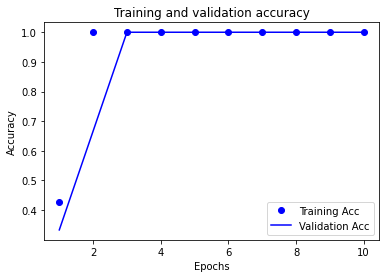

In [ ]:
#Plotting Accuracy

# 정확도와 손실값의 변화를 보고, epoch를 어디에서 조절해야 할 지를 가늠한다.
# 정확도가 떨어지는 구간, 손실값이 높게 나타나는 구간을 확인한다
# 데이터가 큰 경우 대개 epoch를 늘려야 최적값에 도달한다
import matplotlib.pyplot as plt

# 정확도 그리기
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend() 

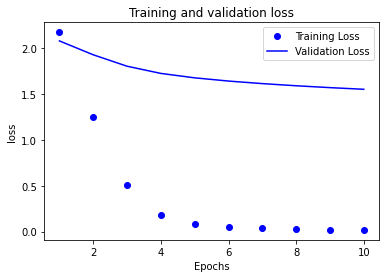

In [ ]:
#Plotting Loss

plt.figure() # 새로운 그림을 그린다
# 손실값 그리기
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend() 
plt.show()


In [ ]:
#Load Model
import os
from tensorflow.keras.models import load_model

filepath = '/content/gdrive/My Drive/pytest/'
os.chdir(filepath)
print("Current Directory:", os.getcwd())

loaded_model = load_model('text_multi_we_model.h5')
print("model loaded:", loaded_model)

with open('text_multi_we_tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)


Current Directory: /content/gdrive/My Drive/pytest
model loaded: <tensorflow.python.keras.engine.sequential.Sequential object at 0x7efffdc6f110>


In [ ]:
#Test Data Loading
# 테스트 데이터의 텍스트와 라벨을 받아온다
texts, labels = make_texts_labels(test_dir, label_types)

print('texts 0:', texts[0])
print('texts len:', len(texts))
print('labels 0:', labels[0])
print('labels len:', len(labels))

texts 0: ﻿나이 들어 아픈 허리 척추관협착증, 좁아진 신경통로 넓혀야 해결 가능

척추 내 신경이 지나가는 통로가 좁아지는 척추관협착증은 대표적인 퇴행성 척추 질환으로, 60대 이후 나이 들어서 생긴 허리 통증은 척추협착증일 확률이 상당히 높다. 나이가 들면 노화현상으로 인해 누구에게나 척추관이 좁아지는 증세가 찾아오기 때문이다. 건강보험심사평가원 통계에 따르면 척추관협착증 환자 수는 2014년 128만 3861명에서 2017년 154만 3477명으로 4년간 20% 이상 증가한 것으로 나타났다. 척추관협착증 환자들은 유독 다리의 통증을 호소한다. 걸을 때 다리가 터질 듯한 통증으로 가다 서다를 반복하거나 허리를 굽히거나 앉으면 통증이 줄어드는 증상이 있다면 척추관협착증일 수 있다.

부평힘찬병원 박진규 원장(신경외과 전문의)은 “척추관협착증은 척추 중앙의 척추관, 신경근관 또는 추간공이 좁아져 어느 부분이 협착되느냐에 따라 추간공협착증, 신경공협착증 등으로 세분화되기도 한다”며 “척추관이 연결된 목부터 꼬리뼈까지 어디에서든 발생할 수 있는데 대개 한 곳에서만 발생하기보다는 여러 곳에서 동시에 발생한다”고 설명했다.

척추관협착증은 허리를 구부릴 수 있는 척추 관절과 척추를 잡아주는 인대가 두꺼워지면서 신경관이 좁아져 다리로 가는 신경을 누르며 발생하는 질환이다. 초기 단계라면 선택적 주사요법, 물리치료와 운동치료 등을 통한 보존적 치료로 효과를 얻을 수 있다. 꽤 좁아진 경우에는 추간공 협착증 풍선확장술을 시행할 수도 있다. 국소 마취하에 척추의 꼬리뼈 쪽으로 풍선이 달린 가느다란 특수 카테터를 삽입, 카테터 관에 약물을 주입해 풍선을 부풀려 척추관을 넓히는 시술이다.

수술이 유일한 치료 방법일 경우도 있다. 통증이 심해 허리를 제대로 펴지 못하고, 5분 이상 걷기 힘들 때, 물리치료나 약물치료, 비수술 주사치료에도 더 이상 효과를 거둘 수 없을 때, 허리디스크와 동반되어 신경학적 결함이 뚜렷할 때 수술을 시행하게 된다. 수술은 척추관을 압박하는 요인

In [ ]:
# 로딩된 tokenizer로 test 데이터를 Sequencing 한다
data = loaded_tokenizer.texts_to_sequences(texts) # 문자열을 숫자 리스트로 변환
x_test = pad_sequences(data, maxlen=maxlen) # maxlen의 수만큼으로 길이를 고정한다
print('data:', data)

# label에 해당하는 부분만 one-hot-encoding 한다.
# x_test = to_one_hot(data, dimension=max_words) # 실행하지 않음
y_test = to_one_hot(labels, dimension=class_number)

data: [[1104, 730, 1253, 844, 824, 1104, 53, 122, 149, 178, 176, 178, 96, 1121, 178, 769, 178, 1040, 18, 122, 149, 257, 122, 178, 149, 149, 1108, 846, 516, 15, 18, 598, 821, 967, 397, 44, 412, 32, 32, 598, 178, 693, 149, 516, 391, 257, 232, 322, 5, 14, 254], [1038, 1038, 232, 1038, 1158, 236, 967, 1217, 44, 677, 178], [44, 44, 63, 127, 343, 44, 471, 127, 1097, 591, 470, 844, 507, 151, 470, 135, 1097, 119, 71, 471, 44, 122, 343, 391, 343, 103, 232]]


In [ ]:
#Test Data Evaluation
# 원-핫 인코딩을 한 테스트데이터의 텍스트와 라벨을 입력한다
test_eval = loaded_model.evaluate(x_test, y_test)
print('prediction model loss & acc:', test_eval) # 최대 44.4% 까지 나왔다

1/1 [==============================] - 0s 130ms/step - loss: 0.0474 - acc: 1.0000
prediction model loss & acc: [0.047409165650606155, 1.0]


In [ ]:
predictions = loaded_model.predict(x_test)
print('predictions shape:', predictions.shape)
print('prediction 0 shape:', predictions[0].shape)
print('prediction 0 sum', np.sum(predictions[0])) # 모든 분류에 대한 확률의 총합은 1이 되어야 한다
print('prediction 0 value:', predictions[0]) # 9개 분류 각각에 대한 확률값
print('prediction 0 max value:', np.argmax(predictions[0])) # prediction 0이 가지고 있는 가장 큰 값의 판정 결과
print('prediction 1 max value:', np.argmax(predictions[1])) # prediction 1이 가지고 있는 가장 큰 값의 판정 결과
print('prediction 2 max value:', np.argmax(predictions[2])) # prediction 2가 가지고 있는 가장 큰 값의 판정 결과

predictions shape: (3, 9)
prediction 0 shape: (9,)
prediction 0 sum 1.0
prediction 0 value: [0.948909   0.00854126 0.0099662  0.00551482 0.01093027 0.00387913
 0.00493364 0.0022659  0.00505981]
prediction 0 max value: 0
prediction 1 max value: 0
prediction 2 max value: 0


In [ ]:
# 1개 데이터 예측
text = ["안녕하세요, 이것은 테스트 문장입니다."] # list 타입으로 만든다
text=[rhinoMorph.onlyMorph_list(rn, sentence, pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=False) for sentence in text]
print('형태소 분석 결과:', text)

data = loaded_tokenizer.texts_to_sequences(text)
x_test = pad_sequences(data, maxlen=maxlen)

predictions = loaded_model.predict(x_test)
print("Result:", predictions) # 각 분류에 대한 확률을 보여준다
print("분류 결과:", np.argmax(predictions[0])) # 가장 큰 확률값을 가진 분류 제시. 0~8 숫자 중 하나

형태소 분석 결과: [['안녕', '하', '이것', '테스트', '문장']]
Result: [[0.96024257 0.00676075 0.00781002 0.00418293 0.00848309 0.0030076
  0.00378398 0.00174572 0.00398337]]
분류 결과: 0
